<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
train = pd.read_csv("titanic/train.csv")
holdout = pd.read_csv("titanic/test.csv")

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
type(train.index)

pandas.core.indexes.range.RangeIndex

In [19]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"LeRoy, Miss. Bertha",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train['Sex'].groupby(train['Pclass']).value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [5]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [21]:
train = process_missing(train)
holdout = process_missing(holdout)
train = process_age(train)
holdout = process_age(holdout)
train = process_fare(train)
holdout = process_fare(holdout)
train = process_titles(train)
holdout = process_titles(holdout)
train = process_cabin(train)
holdout = process_cabin(holdout)
train = create_dummies(train,["Age_categories", "Fare_categories","Title", "Cabin_type","Sex"])
holdout = create_dummies(holdout,["Age_categories", "Fare_categories","Title", "Cabin_type","Sex"])

In [22]:
holdout.dtypes

PassengerId                      int64
Pclass                           int64
Name                            object
Sex                             object
Age                            float64
SibSp                            int64
Parch                            int64
Ticket                          object
Fare                           float64
Embarked                        object
Age_categories                category
Fare_categories               category
Title                           object
Cabin_type                      object
Age_categories_Missing           uint8
Age_categories_Infant            uint8
Age_categories_Child             uint8
Age_categories_Teenager          uint8
Age_categories_Young Adult       uint8
Age_categories_Adult             uint8
Age_categories_Senior            uint8
Fare_categories_0-12             uint8
Fare_categories_12-50            uint8
Fare_categories_50-100           uint8
Fare_categories_100+             uint8
Title_Master             

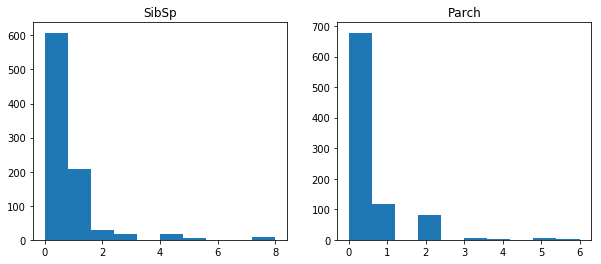

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,2,1)   
ax1.set_title('SibSp')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Parch')
ax1.hist(train['SibSp'])
ax2.hist(train['Parch'])
plt.show()

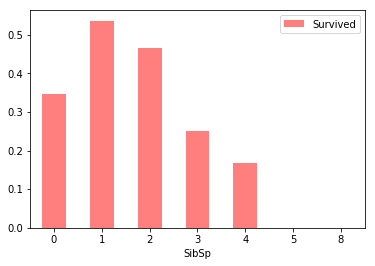

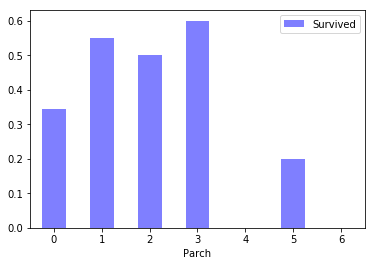

In [7]:
SibSp_pivot = train.pivot_table(index="SibSp",values="Survived")
SibSp_pivot.plot(kind = 'bar',alpha=0.5,rot=0, color='red')
Parch_pivot = train.pivot_table(index = 'Parch', values = 'Survived')
Parch_pivot.plot.bar(alpha=0.5,rot=0,color = 'blue')
plt.legend()

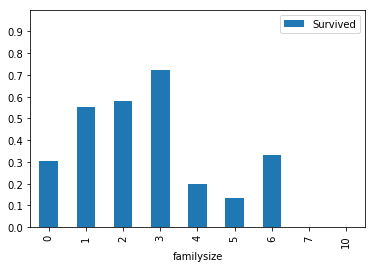

In [8]:
import numpy as np
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
pivot = explore.pivot_table(index='familysize',values="Survived")
pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1))
plt.show()

In [9]:
import numpy as np
def isalone(df): 
    df['isalone']=np.where((df['SibSp']>0) | (df['Parch'] > 0),0,1)
    return df
train = isalone(train)
holdout = isalone(holdout)



In [20]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    df = df.dropna()
    df = df.select_dtypes(['number'])
    all_X = df.drop(df[['PassengerId', 'Survived']], axis=1) 
    all_y = df['Survived']
    
    lr = LogisticRegression()
    knn = KNeighborsClassifier()
    clf = RandomForestClassifier(random_state=1)
    
    models = [lr,clf]
    columns = []
    
    for model in models:
        selector = RFECV(model,cv=10)
        selector.fit(all_X,all_y)
        optimized_columns = all_X.columns[selector.support_]
        
        print(optimized_columns)
        columns.append(optimized_columns)
    return columns 


In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def select_features_rfe(df):
    df = df.dropna()
    df = df.select_dtypes(['number'])
    all_X = df.drop(df[['PassengerId', 'Survived']], axis=1) 
    all_y = df['Survived']
    
    lr = LogisticRegression()
    knn = KNeighborsClassifier()
    clf = RandomForestClassifier(random_state=1)
    
    models = [lr,clf]
    columns = []
    
    for model in models:
        selector = RFE(model)
        selector.fit(all_X,all_y)
        optimized_columns = all_X.columns[selector.support_]
        
        print(optimized_columns)
        columns.append(optimized_columns)
    return columns 


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def select_model(df,features):
    all_X = df[features]
    all_y = df['Survived']
    dictlist = [
    {
        "name": "LogisticRegression",
        "estimator": LogisticRegression(),
        "hyperparameters":
        {
            "solver": ["newton-cg", "lbfgs", "liblinear"]
        }
    },
    {
         "name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparameters":
        {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
    },
    {
        "name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(random_state=1),
        "hyperparameters":
        {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5],
        }   
    }
    ]
    for item in dictlist:
        print(item['name'])
         
        grid = GridSearchCV(item['estimator'], param_grid=item['hyperparameters'], cv=10)
        
        grid.fit(all_X, all_y)
        item['best_params'] = grid.best_params_
        item['best_score'] = grid.best_score_
        item['best_estimator'] = grid.best_estimator_
        print(item['best_params'])
        print(item['best_score'])
        
    return dictlist



In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def select_model_random(df,features):
    all_X = df[features]
    all_y = df['Survived']
    dictlist = [
    {
        "name": "LogisticRegression",
        "estimator": LogisticRegression(),
        "hyperparameters":
        {
            "solver": ["newton-cg", "lbfgs", "liblinear"]
        }
    },
    {
         "name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparameters":
        {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
    },
    {
        "name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(random_state=1),
        "hyperparameters":
        {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5],
        }   
    }
    ]
    for item in dictlist:
        print(item['name'])
        
        n_iter_search = 3
        random_search = RandomizedSearchCV(item['estimator'], param_distributions = item['hyperparameters'], n_iter=n_iter_search,cv=10)
        random_search.fit(all_X, all_y)
        item['best_params'] = random_search.best_params_
        item['best_score'] = random_search.best_score_
        item['best_estimator'] = random_search.best_estimator_
        print(item['best_params'])
        print(item['best_score'])
        
    return dictlist

In [24]:
features = select_features(train) 
#feature[0] = rfecv lr   includes Cabin_T does not exist in holdout --> cannot predict!
#feature[1] = rfecv clf    arr_index = np.where(a == 'apple')

Index(['Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')
Index(['Age', 'Parch', 'Fare'], dtype='object')


In [15]:
features_rfe = select_features_rfe(train)
#feature[0] = rfecv lr
#feature[1] = rfecv clf 

Index(['Pclass', 'SibSp', 'Age_categories_Infant', 'Age_categories_Adult',
       'Age_categories_Senior', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F',
       'Cabin_type_G', 'Cabin_type_Unknown', 'Sex_female'],
      dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Young Adult',
       'Fare_categories_12-50', 'Title_Mr', 'Title_Mrs', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male',
       'isalone'],
      dtype='object')


In [27]:
dictlist = select_model(train,features[1])

LogisticRegression


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
dictlist2 = select_model(train,features_rfe[1])

LogisticRegression
{'solver': 'liblinear'}
0.820426487093
KNeighborsClassifier
{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.774410774411
RandomForestClassifier
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
0.833894500561


In [18]:
def save_submission_file(model,features,filename = 'titanic_submission'):
    holdout_predictions = model.predict(holdout[features])
    submission_df = {"PassengerId":holdout['PassengerId'],"Survived":holdout_predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename+'.csv',index=False)
    

In [19]:
#dictlist = lr, knn, clf
best_model = dictlist[0]['best_estimator']
save_submission_file(best_model,features[1],'submission_rfecvlr_lr') 


In [20]:
#  WARNING! -- dictlist2 trained with features_rfe[0] or features_rfe[1] both have 17 features, may predict using wrong features!
best_model = dictlist2[0]['best_estimator']         
save_submission_file(best_model,features_rfe[1],'submission_rfeclf_lr') 
best_model = dictlist2[1]['best_estimator']
save_submission_file(best_model,features_rfe[1],'submission_rfeclf_knn')
best_model = dictlist2[2]['best_estimator']
save_submission_file(best_model,features_rfe[1],'submission_rfeclf_clf')



In [21]:
best_model = dictlist2[0]['best_estimator']
save_submission_file(best_model,features_rfe[0],'submission_rfelr_lr') 
best_model = dictlist2[1]['best_estimator']
save_submission_file(best_model,features_rfe[0],'submission_rfelr_knn')
best_model = dictlist2[2]['best_estimator']
save_submission_file(best_model,features_rfe[0],'submission_rfelr_clf')

In [68]:
dictlist3 = select_model_random(train,features_rfe[0]) 

LogisticRegression


ValueError: The total space of parameters 3 is smaller than n_iter=4. For exhaustive searches, use GridSearchCV.

In [5]:
%store train
%store holdout
%store features
%store features_rfe
%store dictlist
%store dictlist2


Stored 'train' (DataFrame)
Stored 'holdout' (DataFrame)


UsageError: Unknown variable 'features'


In [40]:
#studying set() vs unique() --> set contains all nan, do not use!
import numpy as np      
s = pd.Series([2,2,3,5,6,7,np.nan,8,5,np.nan,-1])
set(s)
#s.unique()

{nan, nan, -1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0}

In [64]:
for n in range(2, 10):
     for x in range(2, n):
         if n % x == 0:
             print (n, 'equals', x, '*', n/x)
             break
             
     
         # loop fell through without finding a factor
     else: print (n, 'is a prime number')

2 is a prime number
3 is a prime number
4 equals 2 * 2.0
5 is a prime number
6 equals 2 * 3.0
7 is a prime number
8 equals 2 * 4.0
9 equals 3 * 3.0


In [ ]:
#normal usage of for-else: if break, else do not execute, if finish loop without break, else execute
#if no else, will print is prime number no matter found or not 
#if no break, will print is prime number no matter found or not  else clause will always execute--> else: is useless


In [69]:
train.memory_usage(deep=True)

Index             80
PassengerId     7128
Survived        7128
Pclass          7128
Name           74813
Sex            54979
Age             7128
SibSp           7128
Parch           7128
Ticket         56802
Fare            7128
Cabin          34360
Embarked       55182
dtype: int64

In [70]:
holdout.memory_usage(deep=True)

Index             80
PassengerId     3344
Pclass          3344
Name           35314
Sex            25802
Age             3344
SibSp           3344
Parch           3344
Ticket         26700
Fare            3344
Cabin          16030
Embarked       25916
dtype: int64

In [71]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [129]:
holdout['PassengerId']=pd.to_numeric(holdout['PassengerId'], downcast='integer')
#holdout.info()
testset = holdout.copy()
testset['Age']=testset['Age'].fillna(0)

testset['Age']=testset['Age'].astype('int')
testset.info()
testset._data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int16
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(1), int16(1), int32(1), int64(3), object(5)
memory usage: 31.9+ KB


BlockManager
Items: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=418, step=1)
FloatBlock: slice(8, 9, 1), 1 x 418, dtype: float64
IntBlock: [1, 5, 6], 3 x 418, dtype: int64
ObjectBlock: [2, 3, 7, 9, 10], 5 x 418, dtype: object
IntBlock: slice(0, 1, 1), 1 x 418, dtype: int16
IntBlock: slice(4, 5, 1), 1 x 418, dtype: int32

In [130]:
np.iinfo("int16")
np.finfo("float16")


iinfo(min=-32768, max=32767, dtype=int16)